<a href="https://colab.research.google.com/github/Shreya-07/DataCleaningAssignment/blob/main/DatacleaningAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dataset from github and reading via Pandas

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Shreya-07/DataCleaningAssignment/main/uncleaneddata.csv')
df.head(10)

,movie_title,num_critic_for_reviews,duration,DIRECTOR_facebook_likes,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,title_year.1
0,Avatar??,723,178.0,10,855,1000,760505847,886204.0,4834.0,NaN,3054,237000000,2009,936.0,7.9,2009.0
1,Pirates of the Caribbean: At World's End??,302,NaN,563,1000,40000,309404152,471220.0,48350.0,NaN,1238,300000000,2007,5000.0,7.1,NaN
2,Spectre??,602,148.0,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,2015.0
3,The Dark Knight Rises??,813,NaN,22000,23000,27000,448130642,1144337.0,106759.0,NaN,2701,250000000,2012,23000.0,8.5,NaN
4,John Carter??,462,132.0,"""475""",530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,NaN
5,Spider-Man 3??,392,156.0,23,4000,24000,336530303,383056.0,46055.0,NaN,1902,258000000,2007,11000.0,6.2,2007.0
6,Tangled??,324,NaN,15,284,799,200807262,294810.0,NaN,1.0,387,260000000,2010,553.0,7.8,NaN
7,Avengers: Age of Ultron??,635,141.0,10,19000,26000,458991599,462669.0,92000.0,4.0,1117,250000000,2015,21000.0,7.5,NaN
8,Avengers: Age of Ultron??,635,141.0,10,19000,26000,458991599,462669.0,92000.0,4.0,1117,250000000,2015,21000.0,7.5,2015.0
9,Harry Potter and the Half-Blood Prince??,375,153.0,282,10000,25000,301956980,321795.0,58753.0,3.0,973,250000000,2009,11000.0,7.5,NaN


In [65]:
df.shape

(112, 16)

Remove Duplicate Rows if any

In [66]:
df.drop_duplicates(inplace= True)
df.shape

(112, 16)

See Column Headings

In [67]:
df.columns

Index(['movie_title', 'num_critic_for_reviews', 'duration',
       'DIRECTOR_facebook_likes', 'actor_3_facebook_likes',
       'ACTOR_1_facebook_likes', 'gross', 'num_voted_users',
       'Cast_Total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'ACTOR_2_facebook_likes', 'imdb_score', 'title_year.1'],
      dtype='object')

Some Headings are in upper case while others are in lower case so we will change the case.

In [68]:
df.columns = df.columns.str.upper()
df.columns

Index(['MOVIE_TITLE', 'NUM_CRITIC_FOR_REVIEWS', 'DURATION',
       'DIRECTOR_FACEBOOK_LIKES', 'ACTOR_3_FACEBOOK_LIKES',
       'ACTOR_1_FACEBOOK_LIKES', 'GROSS', 'NUM_VOTED_USERS',
       'CAST_TOTAL_FACEBOOK_LIKES', 'FACENUMBER_IN_POSTER',
       'NUM_USER_FOR_REVIEWS', 'BUDGET', 'TITLE_YEAR',
       'ACTOR_2_FACEBOOK_LIKES', 'IMDB_SCORE', 'TITLE_YEAR.1'],
      dtype='object')

Some Column headings are not clear so we will rename them

In [69]:
rename = {'DURATION': 'TIME', 'GROSS':'TOTAL', 'IMDB_SCORE':'RATING', 'TITLE_YEAR':'RELEASE_YEAR', 'TITLE_YEAR.1':'RE_RELEASE_YEAR'}
df.rename(columns=rename,inplace=True)
df.columns

Index(['MOVIE_TITLE', 'NUM_CRITIC_FOR_REVIEWS', 'TIME',
       'DIRECTOR_FACEBOOK_LIKES', 'ACTOR_3_FACEBOOK_LIKES',
       'ACTOR_1_FACEBOOK_LIKES', 'TOTAL', 'NUM_VOTED_USERS',
       'CAST_TOTAL_FACEBOOK_LIKES', 'FACENUMBER_IN_POSTER',
       'NUM_USER_FOR_REVIEWS', 'BUDGET', 'RELEASE_YEAR',
       'ACTOR_2_FACEBOOK_LIKES', 'RATING', 'RE_RELEASE_YEAR'],
      dtype='object')

Drop duplicate movie titles

In [70]:
df.duplicated('MOVIE_TITLE').any()

True

In [71]:
df =  df.drop_duplicates('MOVIE_TITLE')
df.shape

(110, 16)

As we can see from the shape of the dataset, two duplicate rows Removed

Check for the inconsistencies in data types

In [72]:
df.dtypes

MOVIE_TITLE                   object
NUM_CRITIC_FOR_REVIEWS         int64
TIME                         float64
DIRECTOR_FACEBOOK_LIKES       object
ACTOR_3_FACEBOOK_LIKES         int64
ACTOR_1_FACEBOOK_LIKES         int64
TOTAL                          int64
NUM_VOTED_USERS              float64
CAST_TOTAL_FACEBOOK_LIKES    float64
FACENUMBER_IN_POSTER         float64
NUM_USER_FOR_REVIEWS           int64
BUDGET                         int64
RELEASE_YEAR                   int64
ACTOR_2_FACEBOOK_LIKES       float64
RATING                       float64
RE_RELEASE_YEAR              float64
dtype: object

In [73]:
df.TOTAL.dtypes

dtype('int64')

In [74]:
df.TOTAL.astype(float).dtypes

dtype('float64')

NOW check if there is any missing data in the dataset

In [75]:
df.isnull().any()

MOVIE_TITLE                  False
NUM_CRITIC_FOR_REVIEWS       False
TIME                          True
DIRECTOR_FACEBOOK_LIKES       True
ACTOR_3_FACEBOOK_LIKES       False
ACTOR_1_FACEBOOK_LIKES       False
TOTAL                        False
NUM_VOTED_USERS               True
CAST_TOTAL_FACEBOOK_LIKES     True
FACENUMBER_IN_POSTER          True
NUM_USER_FOR_REVIEWS         False
BUDGET                       False
RELEASE_YEAR                 False
ACTOR_2_FACEBOOK_LIKES        True
RATING                       False
RE_RELEASE_YEAR               True
dtype: bool

Find How many Missing values does these columns have

In [76]:
df.isnull().sum()

MOVIE_TITLE                   0
NUM_CRITIC_FOR_REVIEWS        0
TIME                         24
DIRECTOR_FACEBOOK_LIKES      16
ACTOR_3_FACEBOOK_LIKES        0
ACTOR_1_FACEBOOK_LIKES        0
TOTAL                         0
NUM_VOTED_USERS               8
CAST_TOTAL_FACEBOOK_LIKES    16
FACENUMBER_IN_POSTER         40
NUM_USER_FOR_REVIEWS          0
BUDGET                        0
RELEASE_YEAR                  0
ACTOR_2_FACEBOOK_LIKES        8
RATING                        0
RE_RELEASE_YEAR              55
dtype: int64

Total Missing values in the dataset

In [77]:
df.isnull().sum().sum()

167

Fill all NAN values with 0 in all columns

In [78]:
df.head()

,MOVIE_TITLE,NUM_CRITIC_FOR_REVIEWS,TIME,DIRECTOR_FACEBOOK_LIKES,ACTOR_3_FACEBOOK_LIKES,ACTOR_1_FACEBOOK_LIKES,TOTAL,NUM_VOTED_USERS,CAST_TOTAL_FACEBOOK_LIKES,FACENUMBER_IN_POSTER,NUM_USER_FOR_REVIEWS,BUDGET,RELEASE_YEAR,ACTOR_2_FACEBOOK_LIKES,RATING,RE_RELEASE_YEAR
0,Avatar??,723,178.0,10,855,1000,760505847,886204.0,4834.0,NaN,3054,237000000,2009,936.0,7.9,2009.0
1,Pirates of the Caribbean: At World's End??,302,NaN,563,1000,40000,309404152,471220.0,48350.0,NaN,1238,300000000,2007,5000.0,7.1,NaN
2,Spectre??,602,148.0,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,2015.0
3,The Dark Knight Rises??,813,NaN,22000,23000,27000,448130642,1144337.0,106759.0,NaN,2701,250000000,2012,23000.0,8.5,NaN
4,John Carter??,462,132.0,"""475""",530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,NaN


The Time column has value 0 which can be imputed with the mean of all values in the column

In [79]:
df['TIME'] = df.TIME.fillna(df['TIME'].mean())
df.head()

,MOVIE_TITLE,NUM_CRITIC_FOR_REVIEWS,TIME,DIRECTOR_FACEBOOK_LIKES,ACTOR_3_FACEBOOK_LIKES,ACTOR_1_FACEBOOK_LIKES,TOTAL,NUM_VOTED_USERS,CAST_TOTAL_FACEBOOK_LIKES,FACENUMBER_IN_POSTER,NUM_USER_FOR_REVIEWS,BUDGET,RELEASE_YEAR,ACTOR_2_FACEBOOK_LIKES,RATING,RE_RELEASE_YEAR
0,Avatar??,723,178.000000,10,855,1000,760505847,886204.0,4834.0,NaN,3054,237000000,2009,936.0,7.9,2009.0
1,Pirates of the Caribbean: At World's End??,302,152.848837,563,1000,40000,309404152,471220.0,48350.0,NaN,1238,300000000,2007,5000.0,7.1,NaN
2,Spectre??,602,148.000000,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,2015.0
3,The Dark Knight Rises??,813,152.848837,22000,23000,27000,448130642,1144337.0,106759.0,NaN,2701,250000000,2012,23000.0,8.5,NaN
4,John Carter??,462,132.000000,"""475""",530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,NaN


Fill Remaining Nan Records with 0

In [80]:
df = df.fillna(0)
df.head()

,MOVIE_TITLE,NUM_CRITIC_FOR_REVIEWS,TIME,DIRECTOR_FACEBOOK_LIKES,ACTOR_3_FACEBOOK_LIKES,ACTOR_1_FACEBOOK_LIKES,TOTAL,NUM_VOTED_USERS,CAST_TOTAL_FACEBOOK_LIKES,FACENUMBER_IN_POSTER,NUM_USER_FOR_REVIEWS,BUDGET,RELEASE_YEAR,ACTOR_2_FACEBOOK_LIKES,RATING,RE_RELEASE_YEAR
0,Avatar??,723,178.000000,10,855,1000,760505847,886204.0,4834.0,0.0,3054,237000000,2009,936.0,7.9,2009.0
1,Pirates of the Caribbean: At World's End??,302,152.848837,563,1000,40000,309404152,471220.0,48350.0,0.0,1238,300000000,2007,5000.0,7.1,0.0
2,Spectre??,602,148.000000,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,2015.0
3,The Dark Knight Rises??,813,152.848837,22000,23000,27000,448130642,1144337.0,106759.0,0.0,2701,250000000,2012,23000.0,8.5,0.0
4,John Carter??,462,132.000000,"""475""",530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,0.0


Remove duplicates

In [81]:
df.duplicated().any()

False

Removal of unwanted strings from movie name

In [82]:
df['MOVIE_TITLE']

0                                        Avatar??
1      Pirates of the Caribbean: At World's End??
2                                       Spectre??
3                         The Dark Knight Rises??
4                                   John Carter??
                          ...                    
107                                    His Girl??
108                                      Friday??
109                                      Carrie??
110                                        Jaws??
111                                       Rocky??
Name: MOVIE_TITLE, Length: 110, dtype: object

In [83]:
df['MOVIE_TITLE'] = df.MOVIE_TITLE.apply(lambda x: x.replace("??", " ")).astype("str")
df.head(10)

,MOVIE_TITLE,NUM_CRITIC_FOR_REVIEWS,TIME,DIRECTOR_FACEBOOK_LIKES,ACTOR_3_FACEBOOK_LIKES,ACTOR_1_FACEBOOK_LIKES,TOTAL,NUM_VOTED_USERS,CAST_TOTAL_FACEBOOK_LIKES,FACENUMBER_IN_POSTER,NUM_USER_FOR_REVIEWS,BUDGET,RELEASE_YEAR,ACTOR_2_FACEBOOK_LIKES,RATING,RE_RELEASE_YEAR
0,Avatar,723,178.000000,10,855,1000,760505847,886204.0,4834.0,0.0,3054,237000000,2009,936.0,7.9,2009.0
1,Pirates of the Caribbean: At World's End,302,152.848837,563,1000,40000,309404152,471220.0,48350.0,0.0,1238,300000000,2007,5000.0,7.1,0.0
2,Spectre,602,148.000000,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,2015.0
3,The Dark Knight Rises,813,152.848837,22000,23000,27000,448130642,1144337.0,106759.0,0.0,2701,250000000,2012,23000.0,8.5,0.0
4,John Carter,462,132.000000,"""475""",530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,0.0
5,Spider-Man 3,392,156.000000,23,4000,24000,336530303,383056.0,46055.0,0.0,1902,258000000,2007,11000.0,6.2,2007.0
6,Tangled,324,152.848837,15,284,799,200807262,294810.0,0.0,1.0,387,260000000,2010,553.0,7.8,0.0
7,Avengers: Age of Ultron,635,141.000000,10,19000,26000,458991599,462669.0,92000.0,4.0,1117,250000000,2015,21000.0,7.5,0.0
9,Harry Potter and the Half-Blood Prince,375,153.000000,282,10000,25000,301956980,321795.0,58753.0,3.0,973,250000000,2009,11000.0,7.5,0.0
10,Batman v Superman: Dawn of Justice,673,183.000000,0,2000,15000,330249062,0.0,24450.0,0.0,3018,250000000,2016,0.0,6.9,2016.0


Remove unwanted strings from column DIRECTOR_FACEBOOK_LIKES

In [84]:
df['DIRECTOR_FACEBOOK_LIKES'] = df.DIRECTOR_FACEBOOK_LIKES.str.replace("\"", " ")
df.head(10)

,MOVIE_TITLE,NUM_CRITIC_FOR_REVIEWS,TIME,DIRECTOR_FACEBOOK_LIKES,ACTOR_3_FACEBOOK_LIKES,ACTOR_1_FACEBOOK_LIKES,TOTAL,NUM_VOTED_USERS,CAST_TOTAL_FACEBOOK_LIKES,FACENUMBER_IN_POSTER,NUM_USER_FOR_REVIEWS,BUDGET,RELEASE_YEAR,ACTOR_2_FACEBOOK_LIKES,RATING,RE_RELEASE_YEAR
0,Avatar,723,178.000000,10,855,1000,760505847,886204.0,4834.0,0.0,3054,237000000,2009,936.0,7.9,2009.0
1,Pirates of the Caribbean: At World's End,302,152.848837,563,1000,40000,309404152,471220.0,48350.0,0.0,1238,300000000,2007,5000.0,7.1,0.0
2,Spectre,602,148.000000,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,2015.0
3,The Dark Knight Rises,813,152.848837,22000,23000,27000,448130642,1144337.0,106759.0,0.0,2701,250000000,2012,23000.0,8.5,0.0
4,John Carter,462,132.000000,475,530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,0.0
5,Spider-Man 3,392,156.000000,23,4000,24000,336530303,383056.0,46055.0,0.0,1902,258000000,2007,11000.0,6.2,2007.0
6,Tangled,324,152.848837,15,284,799,200807262,294810.0,0.0,1.0,387,260000000,2010,553.0,7.8,0.0
7,Avengers: Age of Ultron,635,141.000000,10,19000,26000,458991599,462669.0,92000.0,4.0,1117,250000000,2015,21000.0,7.5,0.0
9,Harry Potter and the Half-Blood Prince,375,153.000000,282,10000,25000,301956980,321795.0,58753.0,3.0,973,250000000,2009,11000.0,7.5,0.0
10,Batman v Superman: Dawn of Justice,673,183.000000,NaN,2000,15000,330249062,0.0,24450.0,0.0,3018,250000000,2016,0.0,6.9,2016.0


Drop the column RE_RELEASE_YEAR as we already have RELEASE_YEAR Column

In [85]:
df = df.drop('RE_RELEASE_YEAR',axis=1)

In [86]:
df.head()

,MOVIE_TITLE,NUM_CRITIC_FOR_REVIEWS,TIME,DIRECTOR_FACEBOOK_LIKES,ACTOR_3_FACEBOOK_LIKES,ACTOR_1_FACEBOOK_LIKES,TOTAL,NUM_VOTED_USERS,CAST_TOTAL_FACEBOOK_LIKES,FACENUMBER_IN_POSTER,NUM_USER_FOR_REVIEWS,BUDGET,RELEASE_YEAR,ACTOR_2_FACEBOOK_LIKES,RATING
0,Avatar,723,178.000000,10,855,1000,760505847,886204.0,4834.0,0.0,3054,237000000,2009,936.0,7.9
1,Pirates of the Caribbean: At World's End,302,152.848837,563,1000,40000,309404152,471220.0,48350.0,0.0,1238,300000000,2007,5000.0,7.1
2,Spectre,602,148.000000,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8
3,The Dark Knight Rises,813,152.848837,22000,23000,27000,448130642,1144337.0,106759.0,0.0,2701,250000000,2012,23000.0,8.5
4,John Carter,462,132.000000,475,530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6


Now From the Plot We will identify the outliers.
Plot a graph for Movie rating and identify the outlier

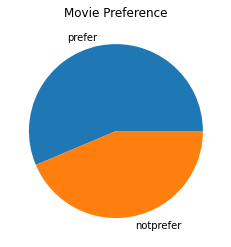

In [87]:
prefer = df.loc[df['RATING']>7.0].count()[0]
notprefer = df.loc[df['RATING']<7.0].count()[0]
labels= ['prefer', 'notprefer']
plt.title('Movie Preference')
plt.pie([prefer, notprefer], labels=labels)
plt.show()

Now we can Keep the movies whose rating is Greater than 7

In [88]:
df = df.loc[df['RATING']>7.0,:]
df.head()

,MOVIE_TITLE,NUM_CRITIC_FOR_REVIEWS,TIME,DIRECTOR_FACEBOOK_LIKES,ACTOR_3_FACEBOOK_LIKES,ACTOR_1_FACEBOOK_LIKES,TOTAL,NUM_VOTED_USERS,CAST_TOTAL_FACEBOOK_LIKES,FACENUMBER_IN_POSTER,NUM_USER_FOR_REVIEWS,BUDGET,RELEASE_YEAR,ACTOR_2_FACEBOOK_LIKES,RATING
0,Avatar,723,178.000000,10,855,1000,760505847,886204.0,4834.0,0.0,3054,237000000,2009,936.0,7.9
1,Pirates of the Caribbean: At World's End,302,152.848837,563,1000,40000,309404152,471220.0,48350.0,0.0,1238,300000000,2007,5000.0,7.1
3,The Dark Knight Rises,813,152.848837,22000,23000,27000,448130642,1144337.0,106759.0,0.0,2701,250000000,2012,23000.0,8.5
6,Tangled,324,152.848837,15,284,799,200807262,294810.0,0.0,1.0,387,260000000,2010,553.0,7.8
7,Avengers: Age of Ultron,635,141.000000,10,19000,26000,458991599,462669.0,92000.0,4.0,1117,250000000,2015,21000.0,7.5


In [89]:
df.shape

(62, 15)

Plotting Histogram to see in which year maximum movies were released

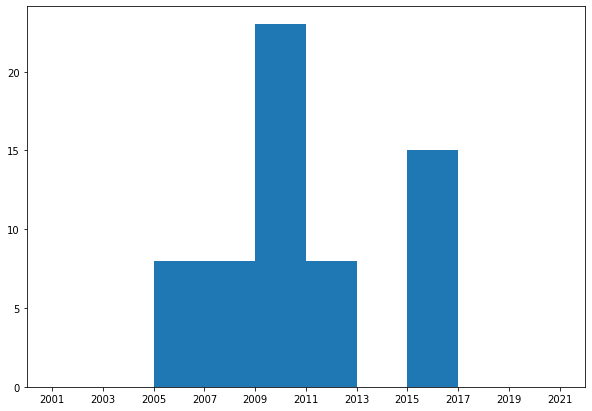

In [90]:
fig, ax = plt.subplots(figsize =(10, 7))
bins = [2001,2003,2005,2007,2009,2011,2013,2015,2017,2019,2021]
ax.hist(df['RELEASE_YEAR'], bins)
plt.xticks(bins)
plt.show()

Now we can find in which year the moview budget was highest and rating greater than 7 on the basis of box plot

In [ ]:
box_plot = df[df['RELEASE_YEAR'].isin(df['RELEASE_YEAR'].unique())]
box_plot = box_plot[['NUM_USER_FOR_REVIEWS', 'RELEASE_YEAR']]
box_plot.boxplot(by='RELEASE_YEAR', grid=True, figsize=(7,7))
plt.show()


Top movies by duration length

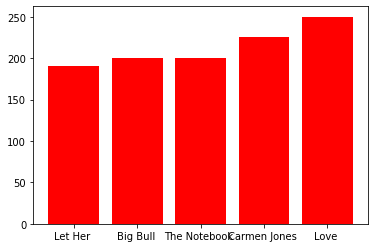

In [92]:
movie_duration = df.iloc[df['TIME'].argsort()[-5:]]
plt.bar(movie_duration['MOVIE_TITLE'], movie_duration['TIME'], color='red')
plt.show()